In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1-Charger ce dataset
### 2-Utiliser les méthodes usuelles de pandas pour obtenir les informations de base sur ce dataset (nombre d'observations et de variables, types des variables, valeurs manquantes, etc.)

In [76]:
df = pd.read_csv("imdb_top_1000.csv")
print(df.head())

print("Nombre d'observations et de variables", df.shape)
print("\nTypes des variables\n", df.dtypes)
print("\nValeurs manquantes \n", df.isnull().sum())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

### 3-Quels sont les 10 réalisateurs les plus représentés dans ce dataset ? Combien de leurs films sont dans ce dataset ? Les extraire.

In [77]:
# Grouper par le nom du réalisateur et compter le nombre de films pour chaque réalisateur
directors = df['Director'].value_counts()
print(directors)
# Sélectionner les 10 réalisateurs les plus représentés
top_directors = directors.head(10)

print("\nLes 10 réalisateurs les plus représentés :\n", top_directors)

# Extraire les films des 10 réalisateurs les plus représentés
top_directors_films = df[df['Director'].isin(top_directors.index)]
print("\n ",top_directors_films[['Director', 'Series_Title']])


Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Neill Blomkamp       1
Tomas Alfredson      1
Duncan Jones         1
Jacques Audiard      1
George Stevens       1
Name: Director, Length: 548, dtype: int64

Les 10 réalisateurs les plus représentés :
 Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Stanley Kubrick       9
Billy Wilder          9
Woody Allen           9
Christopher Nolan     8
Quentin Tarantino     8
Name: Director, dtype: int64

                Director                        Series_Title
2    Christopher Nolan                     The Dark Knight
6    Quentin Tarantino                        Pulp Fiction
7     Steven Spielberg                    Schindler's List
8    Christopher Nolan                           Inception
15     Martin Scorsese                          Goodfellas
..                 ...            

### 4-la variable 'Genre' est-elle interprétable en l'état ? La séparer en plusieurs variables indiquant le premier genre, le deuxième, etc. (utiliser la méthode 'str.split' de pandas). Remplacer les 'None' obtenus par des "NaN'. Étudier les variables obtenues.

In [78]:
print("la variable 'Genre' :\n", df['Genre'])

la variable 'Genre' :
 0                         Drama
1                  Crime, Drama
2          Action, Crime, Drama
3                  Crime, Drama
4                  Crime, Drama
                 ...           
995      Comedy, Drama, Romance
996              Drama, Western
997         Drama, Romance, War
998                  Drama, War
999    Crime, Mystery, Thriller
Name: Genre, Length: 1000, dtype: object


In [79]:
# Séparation de la variable 'Genre' en plusieurs variables
genre_split = df['Genre'].str.split(',', expand=True)
print(genre_split)

genre_split.columns = [f"Genre_{i+1}" for i in range(genre_split.shape[1])]

print(genre_split.head())

          0         1          2
0     Drama      None       None
1     Crime     Drama       None
2    Action     Crime      Drama
3     Crime     Drama       None
4     Crime     Drama       None
..      ...       ...        ...
995  Comedy     Drama    Romance
996   Drama   Western       None
997   Drama   Romance        War
998   Drama       War       None
999   Crime   Mystery   Thriller

[1000 rows x 3 columns]
  Genre_1 Genre_2 Genre_3
0   Drama    None    None
1   Crime   Drama    None
2  Action   Crime   Drama
3   Crime   Drama    None
4   Crime   Drama    None


In [80]:
# Remplacer les 'None' par des NaN
genre_split.replace('None', pd.NA, inplace=True)

In [81]:
#les statistiques descriptives des variables obtenues
print(genre_split.describe())

       Genre_1 Genre_2 Genre_3
count     1000     895     646
unique      14      20      19
top      Drama   Drama   Drama
freq       289     320     115


### 5-Nettoyer la variable 'Runtime'. Créer une variable qualitative dont les modalités seront 'Short', 'Medium', Long', 'VeryLong' correspondant à des durées plus petites que 80, entre 80 et 120, entre 120 et 180 et plus grandes que 180. Étudier la variable obtenue

In [82]:
print(df['Runtime'] )

0      142 min
1      175 min
2      152 min
3      202 min
4       96 min
        ...   
995    115 min
996    201 min
997    118 min
998     97 min
999     86 min
Name: Runtime, Length: 1000, dtype: object


In [83]:
# Supprimer "min" 
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
print("\nPremières lignes de 'Runtime' après nettoyage\n", df['Runtime'].head())



Premières lignes de 'Runtime' après nettoyage
 0    142
1    175
2    152
3    202
4     96
Name: Runtime, dtype: int64


In [84]:
pas = [0, 80, 120, 180, float('inf')]
modalites = ['Short', 'Medium', 'Long', 'VeryLong']

# la création de la nouvelle variable en découpant la variable 'Runtime'
df['new_Runtime'] = pd.cut(df['Runtime'], bins=pas, labels=modalites, right=False)

print("\nLa variable 'new_Runtime' :\n", df.head())


La variable 'new_Runtime' :
                                          Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A      142   
1             The Godfather          1972           A      175   
2           The Dark Knight          2008          UA      152   
3    The Godfather: Part II          1974           A      202   
4              12 Angry Men          1957           U       96   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0

### 6-Créer une variable qualitative dont les modalités seront '+', '++', '+++' correspondant à des notes plus petites que 8, entre 8 et 8,5 et plus grandes que 8,5. Étudier la variable obtenue.

In [85]:
# Définir les intervalles et les labels
pas = [0, 8, 8.5, float('inf')]
modalites = ['+', '++', '+++']

# Création de la variable qualitative en découpant la variable 'IMDB_Rating'
df['new_Rating'] = pd.cut(df['IMDB_Rating'], bins=pas, labels=modalites, right=False)

print("\nla variable 'new_Rating' \n", df)


la variable 'new_Rating' 
                                            Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A      142   
1               The Godfather          1972           A      175   
2             The Dark Knight          2008          UA      152   
3  

In [86]:
print("la fréquence des modalités de 'new_Rating'\n", df['new_Rating'].value_counts())

# Afficher un résumé statistique de la variable
print("\nRésumé statistique de 'new_Rating' :\n", df['new_Rating'].describe())

la fréquence des modalités de 'new_Rating'
 +      537
++     410
+++     53
Name: new_Rating, dtype: int64

Résumé statistique de 'new_Rating' :
 count     1000
unique       3
top          +
freq       537
Name: new_Rating, dtype: object


### 7-Étudier conjointement les variables obtenues aux questions 5 et 6 (représentations graphiques, table de contingence et test du Khi-deux)

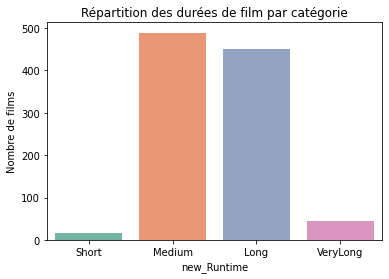

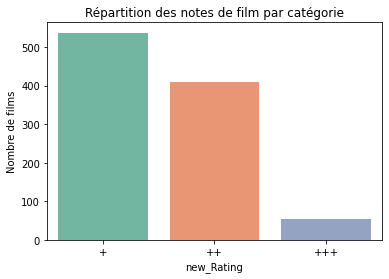

In [87]:
#diagramme en barres de la variable new_Runtime
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='new_Runtime', order=['Short', 'Medium', 'Long', 'VeryLong'], palette='Set2')
plt.title('Répartition des durées de film par catégorie')
plt.xlabel('new_Runtime')
plt.ylabel('Nombre de films')
plt.show()

#diagramme en barres de la variable new_Rating
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='new_Rating', order=['+', '++', '+++'], palette='Set2')
plt.title('Répartition des notes de film par catégorie')
plt.xlabel('new_Rating')
plt.ylabel('Nombre de films')
plt.show()

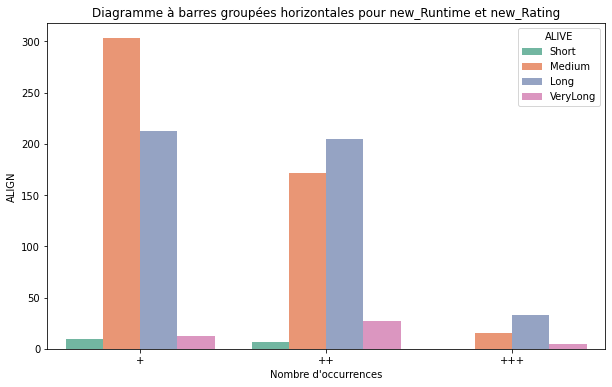

In [88]:
# Diagramme à barres groupées horizontales
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='new_Rating', hue='new_Runtime', palette='Set2')
plt.title('Diagramme à barres groupées horizontales pour new_Runtime et new_Rating')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('ALIGN')
plt.legend(title='ALIVE')
plt.show()

In [89]:
#a table de contingence
table_contingence = pd.crosstab(df['new_Runtime'], df['new_Rating'])

# Afficher la table de contingence
print("Table de contingence :\n", table_contingence)

Table de contingence :
 new_Rating     +   ++  +++
new_Runtime               
Short         10    7    0
Medium       303  171   15
Long         212  205   33
VeryLong      12   27    5


#### L'hypothèse nulle: (H0) Les variables 'new_Runtime' et 'new_Rating'  sont  indépendantes
#### L'hypothèse alternative : (H1) Les variables 'new_Runtime' et 'new_Rating' ne sont pas indépendantes

In [90]:
from scipy.stats import chi2_contingency

# Effectuer le test du Khi-deux
chi2, p, ddl, expected = chi2_contingency(table_contingence)

# Afficher les résultats du test
print("\nRésultats du test du Khi-deux ")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p)
print("Degrés de liberté :", ddl)


Résultats du test du Khi-deux 
Valeur de Chi-deux : 38.78939911701906
p-value : 7.871119337123911e-07
Degrés de liberté : 6


In [91]:
# Conclusion
alpha = 0.05
print("\nConclusion :")
if p < alpha:
    print("Nous rejetons l'hypothèse nulle (H0) Les variables 'new_Runtime' et 'new_Rating' ne sont pas indépendantes.")
else:
    print("Nous ne pouvons pas rejeter l'hypothèse nulle (H0) Les variables 'new_Runtime' et 'new_Rating' sont indépendantes.")


Conclusion :
Nous rejetons l'hypothèse nulle (H0) Les variables 'new_Runtime' et 'new_Rating' ne sont pas indépendantes.
